<div style="text-align: center; color: Pink; font-family: Arial;">
    <h2> GMM Implementation With & without sklearn </h2>
</div>

In [64]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_blobs
from scipy.stats import multivariate_normal


In [65]:
# Implement GMM from scratch
def gmm(X, n_clusters, n_iterations=100):
    n_samples, n_features = X.shape
    means = X[np.random.choice(n_samples, n_clusters, replace=False)]
    covariances = [np.eye(n_features)] * n_clusters
    weights = np.ones(n_clusters) / n_clusters
    
    for _ in range(n_iterations):
        # E-step
        responsibilities = []
        for k in range(n_clusters):
            numerator = multivariate_normal.pdf(X, mean=means[k], cov=covariances[k]) * weights[k]
            responsibilities.append(numerator)
        responsibilities = np.array(responsibilities).T
        responsibilities /= responsibilities.sum(axis=1, keepdims=True)
        
        # M-step
        total_resp = np.sum(responsibilities, axis=0)
        weights = total_resp / n_samples
        means = (responsibilities.T @ X) / total_resp[:, np.newaxis]
        for k in range(n_clusters):
            diff = X - means[k]
            covariances[k] = ((responsibilities[:, k] * diff.T) @ diff) / total_resp[k]
            
    return means, covariances, weights
    

In [68]:
def plot_BIC_AIC_scores(K, bic_scores, aic_scores):
    plt.figure(figsize=(8, 5))
    plt.plot(K, bic_scores, label='BIC', marker='o', color='hotpink', linestyle='-', linewidth=2)
    plt.plot(K, aic_scores, label='AIC', marker='s', color='royalblue', linestyle='--', linewidth=2)
    plt.title('BIC & AIC for Optimal Clusters')
    plt.xlabel('Number of clusters')
    plt.xticks(K)
    plt.ylabel('Score')
    plt.legend()
    plt.grid()
    plt.show()

In [66]:
data = pd.read_csv('Clustering_gmm.csv')

In [69]:
def Calculate_GMM_BIC_AIC(data, K, n_init=10):
    bic_scores = []  # Store BIC values
    aic_scores = []  # Store AIC values

    for k in K:
        gmm = GaussianMixture(n_components=k, random_state=1234, n_init=n_init)
        gmm.fit(data)
        bic_scores.append(gmm.bic(data))
        aic_scores.append(gmm.aic(data))

    return bic_scores, aic_scores


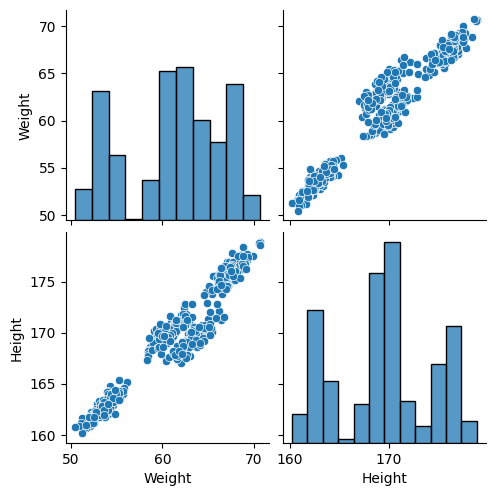

In [67]:
sns.pairplot(data=data)

From the plot data is distributed in 4 clusters

In [71]:
# estimated_means, estimated_covariances, estimated_weights = gmm(data, n_clusters)

In [72]:
K = range(1, 11)

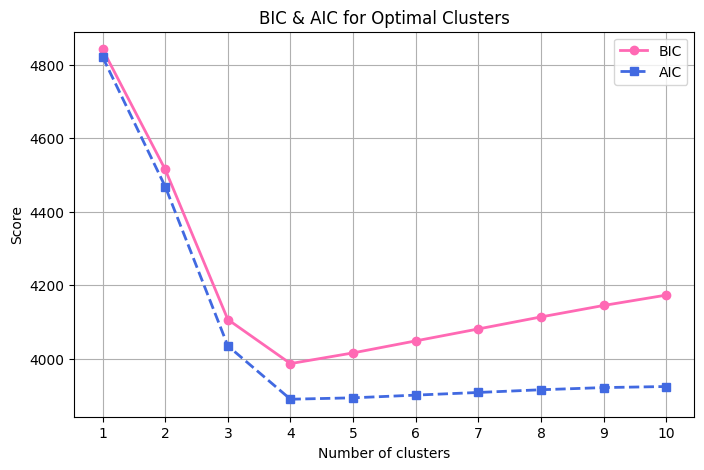

In [73]:
BIC_Score, AIC_Score = Calculate_GMM_BIC_AIC(data, K, n_init=10)
plot_BIC_AIC_scores(K, BIC_Score, AIC_Score)

Does Scaling lead to better results?

In [74]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

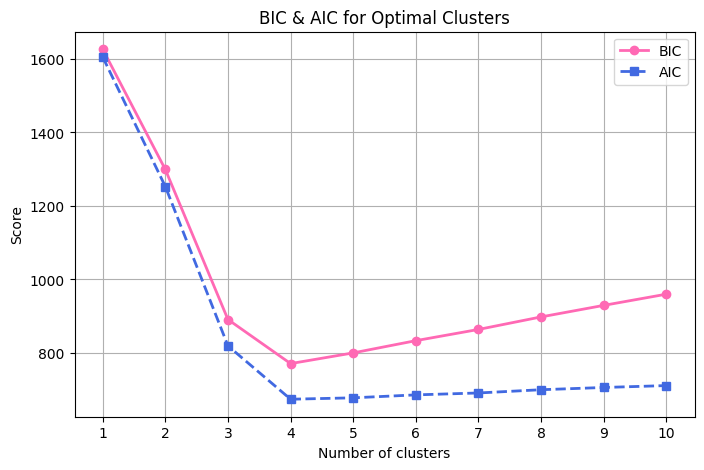

In [75]:
BIC_Score, AIC_Score = Calculate_GMM_BIC_AIC(data_scaled, K, n_init=10)
plot_BIC_AIC_scores(K, BIC_Score, AIC_Score)

In [76]:
print("The BIC scores are: ", BIC_Score)
print("The AIC scores are: ", AIC_Score)

The BIC scores are:  [np.float64(1626.3400250214843), np.float64(1299.1601419173296), np.float64(891.0099860030404), np.float64(771.1150781723359), np.float64(800.2170893017224), np.float64(833.5039048045804), np.float64(863.9944249855687), np.float64(898.1182100636361), np.float64(929.4906497982747), np.float64(959.9675791101176)]
The AIC scores are:  [np.float64(1605.2669845293733), np.float64(1252.7994528346856), np.float64(819.3616483298631), np.float64(674.1790919086255), np.float64(677.9934544474788), np.float64(685.9926213598037), np.float64(691.1954929502588), np.float64(700.0316294377931), np.float64(706.1164205818986), np.float64(711.3057013032084)]


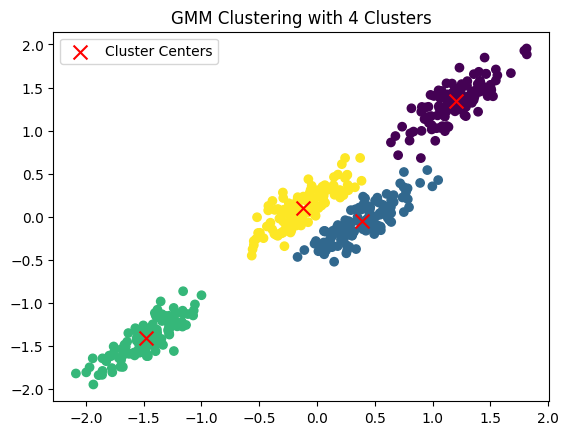

In [77]:
# Fit GMM with the optimal number of clusters
optimal_n_clusters = np.argmin(BIC_Score) + 1 
gmm = GaussianMixture(n_components=optimal_n_clusters, random_state=0)
gmm.fit(data_scaled)

# Predict clusters
predicted_clusters = gmm.predict(data_scaled)

# Visualize the results
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=predicted_clusters, cmap='viridis')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='x', s=100, color='red', label='Cluster Centers')
plt.legend()
plt.title(f'GMM Clustering with {optimal_n_clusters} Clusters')
plt.show()

## BIC is the same with scaled data or without scaled data 

In [78]:
n_samples = 300
n_features = 2
n_clusters = 3
random_state = 42

data, true_labels = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

In [90]:

def GMM_Manual_Implementation(data, n_clusters, n_init=10):

    """""

    Parameters
    ----------
    data : array-like, shape (n_samples, n_features) "The input data"
    n_clusters : int "The number of clusters"
    n_iterations : int "The number of iterations"

    Returns
    -------
    means : array-like, shape (n_clusters, n_features) "The estimated means of the clusters"
    covariances : list of arrays "The estimated covariance matrices of the clusters"
    weights : array-like, shape (n_clusters,) "The estimated weights of the clusters"

    """

    # Initialize the parameters
    n_samples, n_features = data.shape
    weights = np.ones(n_clusters) / n_clusters
    means = data[np.random.choice(n_samples, n_clusters, replace=False)]
    covariances = np.array([np.eye(n_features)] * n_clusters)

    # Initialize the log-likelihood
    log_likelihood = 0

    for _ in range(n_init):
        # E-step
        # Calculate the responsibilities for each data point
        # responsibilities is the probability of each data point belonging to each cluster 
        # shape = (n_samples, n_clusters)
        responsibilities = np.zeros((n_samples, n_clusters))
        for i in range(n_clusters):
            responsibilities[:, i] = weights[i] * \
                multivariate_normal.pdf(data, means[i], covariances[i])

        # Normalize the responsibilities
        # likelihood is the sum of the probability of each data point belonging to each cluster
        # log_likelihood is the log of the likelihood to avoid overflow while calculating the likelihood which means the sum of the probability of each data point belonging to each cluster
        # shape = (n_samples, n_clusters)
        log_likelihood_new = np.sum(np.log(np.sum(responsibilities, axis=1)))

        # Check for convergence
        # If the difference between the new log-likelihood and the old log-likelihood is less than 1e-6, break the loop
        if log_likelihood_new - log_likelihood < 1e-6:
            break

        log_likelihood = log_likelihood_new

        # M-step
        # Update the weights, means, and covariances
        # weights is the average of the responsibilities
        # means is the weighted average of the data points 
        # covariances is the weighted average of the squared differences between the data points and the means
        weights = np.mean(responsibilities, axis=0)
        means = np.dot(responsibilities.T, data) / np.sum(responsibilities, axis=0)[:, np.newaxis]
        covariances = np.array([np.dot((data - means[i]).T, (data - means[i]) * responsibilities[:, i, np.newaxis]) / np.sum(responsibilities, axis=0)[i] for i in range(n_clusters)])

    return weights, means, covariances

In [ ]:
weights, means, covariances = GMM_Manual_Implementation(data, n_clusters, n_init=10)


In [ ]:
# Fit GMM with the optimal number of clusters
optimal_n_clusters = np.argmin(BIC_Score) + 1
gmm = GaussianMixture(n_components=optimal_n_clusters, random_state=0)
gmm.fit(data_scaled)

In [ ]:
# Predict clusters
predicted_clusters = gmm.predict(data_scaled)

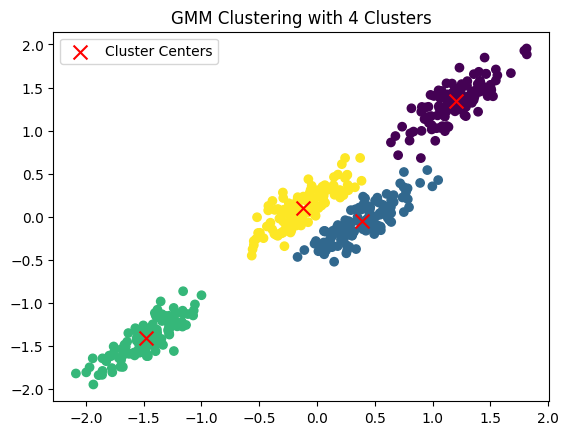

In [91]:
# Visualize the results
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=predicted_clusters, cmap='viridis')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='x', s=100, color='red', label='Cluster Centers')
plt.legend()
plt.title(f'GMM Clustering with {optimal_n_clusters} Clusters')
plt.show()


In [83]:
# Generate a synthetic dataset
n_samples = 300
n_features = 2
n_clusters = 3
random_state = 42

data, true_labels = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# Implement GMM from scratch
def gmm(X, n_clusters, n_iterations=100):


    n_samples, n_features = X.shape # get hte shape of the data

    # choice function is used to randomly select the means from the data points
    # it works by randomly select data points by the number of clusters from the data points so that we can use them as the initial means
    # if K = 3 it will select 3 random data points from the data
    # inplace = False means that the data points will not be replaced it will stay in the data points as it is not deleted
    means = X[np.random.choice(n_samples, n_clusters, replace=False)] # randomly select the means from the data points # shape (n_clusters, n_features)

    # initialize the covariance matrices to identity matrices 
    # shape (n_features, n_features)
    covariances = [np.eye(n_features)] * n_clusters

    # initialize the weights to be equal
    # shape (n_clusters,)
    # devide the weights by the number of clusters to make them equal less than 1
    # initialize the weights to be equal values
    weights = np.ones(n_clusters) / n_clusters
    

    for _ in range(n_iterations):
        # E-step : is to calculate the responsibilities
        responsibilities = []
        for k in range(n_clusters):
            numerator = multivariate_normal.pdf(X, mean=means[k], cov=covariances[k]) * weights[k]
            responsibilities.append(numerator)
        responsibilities = np.array(responsibilities).T
        responsibilities /= responsibilities.sum(axis=1, keepdims=True)
        
        # M-step : is to update the parameters
        total_resp = np.sum(responsibilities, axis=0)
        weights = total_resp / n_samples
        means = (responsibilities.T @ X) / total_resp[:, np.newaxis]
        for k in range(n_clusters):
            diff = X - means[k]
            covariances[k] = ((responsibilities[:, k] * diff.T) @ diff) / total_resp[k]
            
    return means, covariances, weights






In [84]:
# Fit GMM from scratch
estimated_means, estimated_covariances, estimated_weights = gmm(data, n_clusters)

In [85]:
# Assign samples to clusters
def assign_clusters(X, means, covariances, weights):
    n_samples = X.shape[0]
    n_clusters = len(means)
    responsibilities = np.zeros((n_samples, n_clusters))
    for k in range(n_clusters):
        responsibilities[:, k] = multivariate_normal.pdf(X, mean=means[k], cov=covariances[k]) * weights[k]
    cluster_assignments = np.argmax(responsibilities, axis=1)
    return cluster_assignments


In [86]:
predicted_assignments = assign_clusters(data, estimated_means, estimated_covariances, estimated_weights)

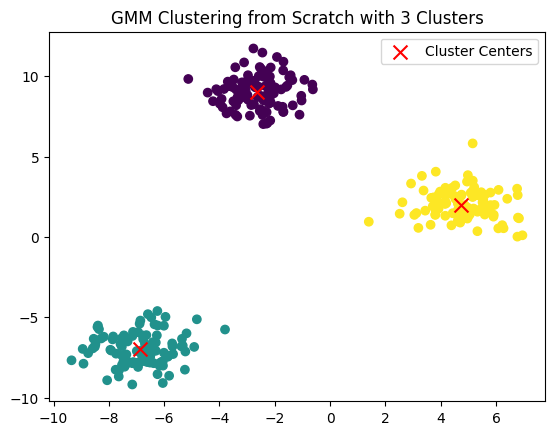

In [87]:
# gmm(data, n_clusters)
# Visualize the results
plt.scatter(data[:, 0], data[:, 1], c=predicted_assignments, cmap='viridis')
plt.scatter(estimated_means[:, 0], estimated_means[:, 1], marker='x', s=100, color='red', label='Cluster Centers')
plt.legend()
plt.title(f'GMM Clustering from Scratch with {n_clusters} Clusters')
plt.show()